In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
#vacc_age_df = pd.read_hdf("../../data/external/vaccinations-by-age-group.h5")
#vacc_manu_df = pd.read_hdf("../../data/external/vaccinations-by-manufacturer.h5")
df = pd.read_hdf("../../data/processed/covid_data.h5")
df.head()

,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,people_fully_vaccinated_per_hundred,human_development_index,life_expectancy,median_age,population_density,aged_65_older_percentage,aged_70_older_percentage,total_cases_per_million_level
0,597.029,9.59,1803.987,0.50,25.61,0.511,64.83,18.6,54.422,6.275412e-08,3.250766e-08,0
1,304.195,10.08,11803.431,2.89,44.62,0.795,78.57,38.0,104.871,4.639875e-06,3.040828e-06,1
2,278.364,6.73,13913.839,1.90,14.43,0.748,76.88,29.1,17.348,1.383197e-07,8.589583e-08,0
3,276.045,3.94,5819.495,0.00,21.96,0.581,61.15,16.8,23.890,6.757707e-08,3.827026e-08,0
4,191.511,13.17,21490.943,3.80,66.53,0.778,77.02,32.1,231.845,7.393465e-05,4.938574e-05,1


Text(0.5, 1.0, 'total cases per million level')

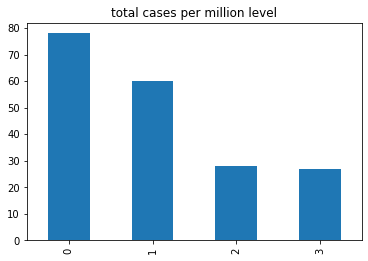

In [35]:
## Now we do an EDA to see some key characteristics of the dataset
# 1. Total cases per million histogram by level (0-3)
plt1 = df['total_cases_per_million_level'].value_counts().plot(kind='bar')
plt1.set_title("total cases per million level")

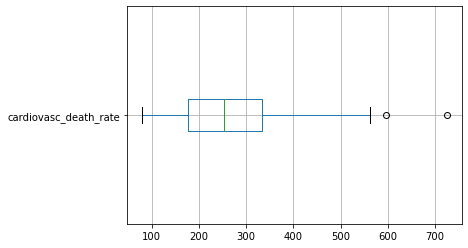

0.25    176.1925
0.50    252.6750
0.75    332.4330
Name: cardiovasc_death_rate, dtype: float64


In [42]:
# 2. Cardiovascular death rate related. 
# We use a box plot and print its quartile values (after dropping zero values)
df1 = df.loc[df["cardiovasc_death_rate"] > 0]
df1.boxplot('cardiovasc_death_rate', vert=False)
plt.show()

print(df1['cardiovasc_death_rate'].quantile([0.25, 0.5, 0.75]))

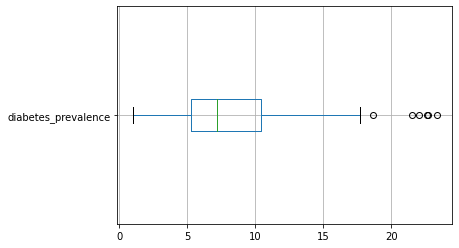

0.25     5.305
0.50     7.155
0.75    10.430
Name: diabetes_prevalence, dtype: float64


In [43]:
# 3. Diabetes prevalence related. 
# We use the same methods as in 2.
df1 = df.loc[df["diabetes_prevalence"] > 0]
df1.boxplot('diabetes_prevalence', vert=False)
plt.show()

print(df1['diabetes_prevalence'].quantile([0.25, 0.5, 0.75]))

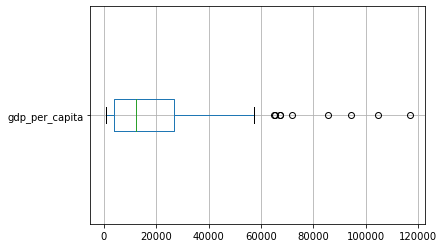

0.1      1713.8320
0.2      3040.7768
0.3      5355.8874
0.4      7866.3806
0.5     12236.7060
0.6     16019.5198
0.7     22747.5890
0.8     32453.2868
0.9     44997.0310
1.0    116935.6000
Name: gdp_per_capita, dtype: float64


In [57]:
# 4. GDP per capita. 
# We use the same methods as in 2.
df1 = df.loc[df["gdp_per_capita"] > 0]
df1.boxplot('gdp_per_capita', vert=False)
plt.show()

print(df1['gdp_per_capita'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

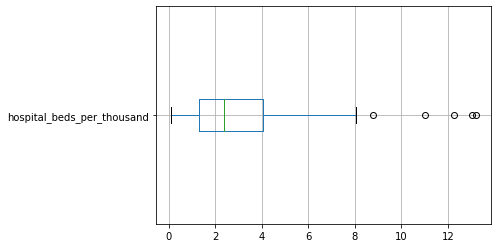

0.1    0.700
0.2    1.076
0.3    1.400
0.4    1.900
0.5    2.360
0.6    2.898
0.7    3.600
0.8    4.518
0.9    6.482
Name: hospital_beds_per_thousand, dtype: float64


In [45]:
# 5. hospital beds per thousand inhabitants. 
# We use the same methods as in 2.
df1 = df.loc[df["hospital_beds_per_thousand"] > 0]
df1.boxplot('hospital_beds_per_thousand', vert=False)
plt.show()

print(df1['hospital_beds_per_thousand'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

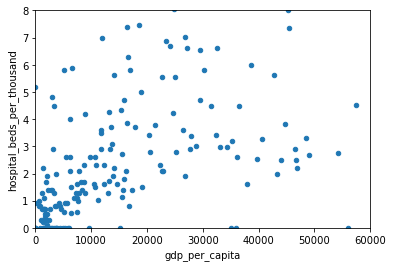

In [60]:
# 6. Relationship between gdp per capita and hospital beds per tsd.
# We draw a scatter plot between these two. 
ax =df.plot.scatter(x="gdp_per_capita", y="hospital_beds_per_thousand")
ax.set_xlim(0, 60000)
ax.set_ylim(0, 8)

plt.show()


In [117]:
def get_count(df):
    try:
        df = df.groupby(["location"])[["date"]].count().rename(columns={"date": "count"}).reset_index()
    except:
        df = df.groupby(["entity"])[["date"]].count().rename(columns={"date": "count"}).reset_index().rename(columns={"entity":"location"})
    df_count = df.sort_values("count")
    return df_count

def get_boundary_count(boundary_count=200):
    below_boundary = []
    above_boundary = []
    below_boundary_country = []
    for df in [hospital_df, vacc_age_df, vacc_manu_df, covid_df]:
        below_boundary.append(len([i for i in get_count(df)["count"] if i < boundary_count]))
        above_boundary.append(len([i for i in get_count(df)["count"] if i > boundary_count]))
        below_boundary_country.append(get_count(df)[get_count(df)["count"] < boundary_count]["location"].tolist())
    return below_boundary, above_boundary, below_boundary_country

In [ ]:
# hospital_df = pd.read_hdf("../../data/external/owid-covid-data.h5")
# # df_count = hospital_df.groupby(["location"])[["iso_code"]].count().rename(columns={"iso_code": "count"}).reset_index()
# # df_count = df_count.sort_values("count")
# get_count(hospital_df )

# plt.figure(figsize=(4,45))
# plt.style.use('ggplot')

# plt.barh(df_count["location"].tolist(), df_count["count"].tolist())
# plt.title("Data Counts for Each Country")
# plt.ylabel("country")
# plt.xlabel("count")
# plt.show()

In [118]:
boundary = 300
df = pd.DataFrame.from_dict({"less than "+str(boundry)+" data": get_boundary_count(boundary)[0],
                             "more than "+str(boundry)+" data": get_boundary_count(boundary)[1],
                             "country name with data < "+str(boundry): get_boundary_count(boundary)[2]})
df.index = ["covid-hospitalizations", "vaccinations-by-age-group",
            "vaccinations-by-manufacturer", "owid-covid-data"]
print("Countries with less than "+str(boundary)+" data entries will not be used: ", 
      set(sum(get_boundary_count(boundary)[2], [])), "\n")
print("Data Counts of Countries:")
df

Countries with less than 300 data entries will not be used:  {'Western Sahara', 'Singapore', 'Canada', 'Liechtenstein', 'Finland', 'Iceland', 'Russia', 'Sweden'} 

Data Counts of Countries:


,less than 300 data,more than 300 data,country name with data < 300
covid-hospitalizations,3,48,"[Russia, Liechtenstein, Singapore]"
vaccinations-by-age-group,0,38,[]
vaccinations-by-manufacturer,5,39,"[Iceland, Liechtenstein, Sweden, Finland, Canada]"
owid-covid-data,1,247,[Western Sahara]
